<a href="https://colab.research.google.com/github/zoyaholin/Neur265HOLIN/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, run the following line of code to get rid of empty values:

<code>patch_seq['ISI'] = patch_seq['ISI'].fillna(0)</code>

5. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

6. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

7. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

8. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

9. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

10. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

11. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

12. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

13. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

14. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

15. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

16. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

17. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

18. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

19. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

20. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Zoya Holin

*Intro to Neural Data Analysis*

**Due March 27, 2023**

In [28]:
#Importing pandas, plotlib.pyplot, and scipy,stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [29]:
##Importing set of data
url= 'https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv'
patch_seq= pd.read_csv(url)
patch_seq

,ISI,Fast_Trough,Marker
0,77.337143,-49.899998,Sst
1,17.177895,-44.462498,Sst
2,48.294737,-47.350002,Sst
3,8.980000,-45.656254,Sst
4,30.315385,-50.737499,Sst
...,...,...,...
360,11.052333,-54.743752,Pvalb
361,8.860360,-64.875008,Pvalb
362,9.192897,-51.312504,Pvalb
363,10.544731,-52.281254,Pvalb


In [4]:
#Getting rid of empty values
patch_seq['ISI'] = patch_seq['ISI'].fillna(0)

<Axes: >

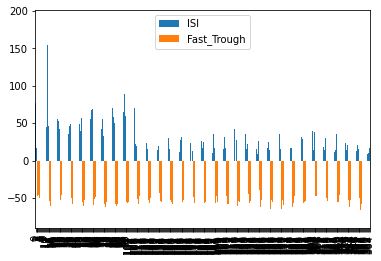

In [26]:
#Making bar graph 
df = pd.DataFrame(patch_seq)
df.plot.bar()



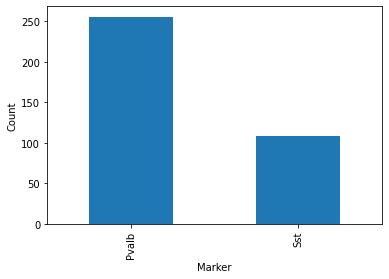

In [46]:
#Bar graph 
patch_seq['Marker'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Marker')

plt.show()

In [27]:
#Pie Chart
df = pd.DataFrame(patch_seq)
df.plot.pie(subplots=True)

TypeError: ignored

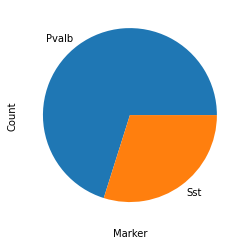

In [47]:
#Pie chart 
patch_seq['Marker'].value_counts().plot(kind='pie')

plt.ylabel('Count')
plt.xlabel('Marker')

plt.show()

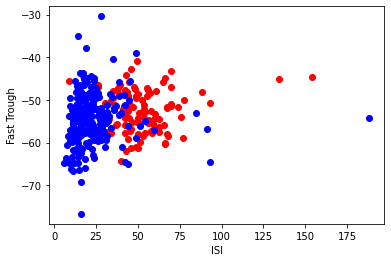

In [49]:
#loop 
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "red" )
  if patch_seq.iloc[i,2] == 'Pvalb':
      plt.scatter(patch_seq. iloc[i, 0],patch_seq.iloc[i,1],color = "blue")
plt.xlabel('ISI')
plt.ylabel ('Fast Trough')
plt.show()



In [50]:
#Output for scatter plot
def makeScatter():
  patch_length=len(patch_seq)
  

In [54]:
#Returning mean, sd, and range 
patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


In [ ]:
#Interpreting data
The pvalb mean is a more negative value, so the undershoot was greater than the Sst one. So the action potential for pvalb was greater than the Sst one. 


In [57]:
#Returning skewness for pvalb and Sst
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

In [ ]:
#Interpreting skewness results for pvalb and Sst
The pvalb and Sst results were both between 0.5, indicating a normal distribution. 


In [61]:
#Returning skewness for ISI 
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

In [ ]:
#Interpreting skewness results for ISI
The Pvalb and Sst results were way greater than one, so the results were skewed to the right. 


In [72]:
#T-test to see if fast-trough and ISI values differ for the Sst and Pvalb marker genes

sst_neurons=patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons=patch_seq[patch_seq['Marker']=='Pvalb']

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])


Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

In [ ]:
#Interpreting ttest
The pvalue is less than 0.05, therefore we can reject the null hypothesis and there is a significance in difference between the undershoot voltage. 

In [77]:
#Ttest for ISI
sst_neurons=patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons=patch_seq[patch_seq['Marker']=='Pvalb']

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['ISI'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
#Interpreting ttest
The p-value is greater than 0.05 so there is no significance between the undershoot voltage when you analyze the ISI. 